In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
application = pd.read_csv("data/application_record.csv")
application.columns=map(str.lower,application.columns)
application.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   438557 non-null  int64  
 1   code_gender          438557 non-null  object 
 2   flag_own_car         438557 non-null  object 
 3   flag_own_realty      438557 non-null  object 
 4   cnt_children         438557 non-null  int64  
 5   amt_income_total     438557 non-null  float64
 6   name_income_type     438557 non-null  object 
 7   name_education_type  438557 non-null  object 
 8   name_family_status   438557 non-null  object 
 9   name_housing_type    438557 non-null  object 
 10  days_birth           438557 non-null  int64  
 11  days_employed        438557 non-null  int64  
 12  flag_mobil           438557 non-null  int64  
 13  flag_work_phone      438557 non-null  int64  
 14  flag_phone           438557 non-null  int64  
 15  flag_email       

In [5]:
# transactional infromation
credit = pd.read_csv("data/credit_record.csv")
credit.columns = map(str.lower, credit.columns)
credit.head()

,id,months_balance,status
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1048575 non-null  int64 
 1   months_balance  1048575 non-null  int64 
 2   status          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [7]:
credit['status']=credit['status'].replace({'X':-2,'C':-1})
credit['status']=credit['status'].astype('int')
credit.status = credit.status.apply(lambda x:x+1)

In [8]:
credit.head()

,id,months_balance,status
0,5001711,0,-1
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,0


In [9]:
#Find the latest month
credit_month = credit.groupby('id').months_balance.max().reset_index()
credit_month.head()

,id,months_balance
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [10]:
#Merge the df with latest months matched with its status
record = pd.merge(credit_month, credit, how="inner", on=["id", "months_balance"])
record.head()

,id,months_balance,status
0,5001711,0,-1
1,5001712,0,0
2,5001713,0,-1
3,5001714,0,-1
4,5001715,0,-1


In [11]:
#Merge the record df with application df

df = pd.merge(application, record, on="id", how="inner")
df.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,months_balance,status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,-1


In [12]:
#Rename columns
df = df.rename(columns={'code_gender':'gender',
                   'flag_own_car':'car',
                   'flag_own_realty':'property',
                   'cnt_children':'children',
                   'amt_income_total':'annual_income',
                   'name_income_type':'income_type',
                   'name_education_type':'education',
                   'name_family_status':'family_status',
                   'name_housing_type':'housing_type',
                   'days_birth':'birth_date',
                   'days_employed':'employment',
                   'flag_mobil':'mobile_phone',
                   'flag_work_phone':'work_phone',
                   'flag_phone':'phone',
                   'flag_email': 'email',
                   'cnt_fam_members':'fam_members'
                   })
df.head()

,id,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,birth_date,employment,mobile_phone,work_phone,phone,email,occupation_type,fam_members,months_balance,status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,-1


In [13]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               36457 non-null  int64  
 1   gender           36457 non-null  object 
 2   car              36457 non-null  object 
 3   property         36457 non-null  object 
 4   children         36457 non-null  int64  
 5   annual_income    36457 non-null  float64
 6   income_type      36457 non-null  object 
 7   education        36457 non-null  object 
 8   family_status    36457 non-null  object 
 9   housing_type     36457 non-null  object 
 10  birth_date       36457 non-null  int64  
 11  employment       36457 non-null  int64  
 12  mobile_phone     36457 non-null  int64  
 13  work_phone       36457 non-null  int64  
 14  phone            36457 non-null  int64  
 15  email            36457 non-null  int64  
 16  occupation_type  25134 non-null  object 
 17  fam_members 

In [15]:
df.isnull().sum()

id                     0
gender                 0
car                    0
property               0
children               0
annual_income          0
income_type            0
education              0
family_status          0
housing_type           0
birth_date             0
employment             0
mobile_phone           0
work_phone             0
phone                  0
email                  0
occupation_type    11323
fam_members            0
months_balance         0
status                 0
dtype: int64

In [16]:
df.occupation_type  

0                   NaN
1                   NaN
2        Security staff
3           Sales staff
4           Sales staff
              ...      
36452          Managers
36453    Medicine staff
36454    Medicine staff
36455       Sales staff
36456          Laborers
Name: occupation_type, Length: 36457, dtype: object

In [17]:
df.occupation_type =df.occupation_type.fillna("Others")

In [18]:
df.isnull().sum()

id                 0
gender             0
car                0
property           0
children           0
annual_income      0
income_type        0
education          0
family_status      0
housing_type       0
birth_date         0
employment         0
mobile_phone       0
work_phone         0
phone              0
email              0
occupation_type    0
fam_members        0
months_balance     0
status             0
dtype: int64

In [19]:
df['age'] = df.birth_date.apply(lambda x: round(x/-365,0))
df['year_of_employment'] = df.employment.apply(lambda x: round(x/-365,0) if x<0 else 0)

df = df.drop(columns=["birth_date","employment"])

In [21]:
df.head()

,id,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,mobile_phone,work_phone,phone,email,occupation_type,fam_members,months_balance,status,age,year_of_employment
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Others,2.0,0,0,33.0,12.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Others,2.0,0,0,33.0,12.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,0,0,59.0,3.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,1,52.0,8.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,-22,-1,52.0,8.0


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,36457.0,5.078227e+06,41875.240788,5008804.0,5042028.0,5074614.0,5115396.0,5150487.0
children,36457.0,4.303152e-01,0.742367,0.0,0.0,0.0,1.0,19.0
annual_income,36457.0,1.866857e+05,101789.226482,27000.0,121500.0,157500.0,225000.0,1575000.0
mobile_phone,36457.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
work_phone,36457.0,2.255260e-01,0.417934,0.0,0.0,0.0,0.0,1.0
phone,36457.0,2.948131e-01,0.455965,0.0,0.0,0.0,1.0,1.0
email,36457.0,8.972214e-02,0.285787,0.0,0.0,0.0,0.0,1.0
fam_members,36457.0,2.198453e+00,0.911686,1.0,2.0,2.0,3.0,20.0
months_balance,36457.0,-5.831802e+00,11.326494,-60.0,-6.0,0.0,0.0,0.0
status,36457.0,-2.715528e-03,0.783104,-1.0,-1.0,0.0,0.0,6.0


<AxesSubplot:xlabel='annual_income'>

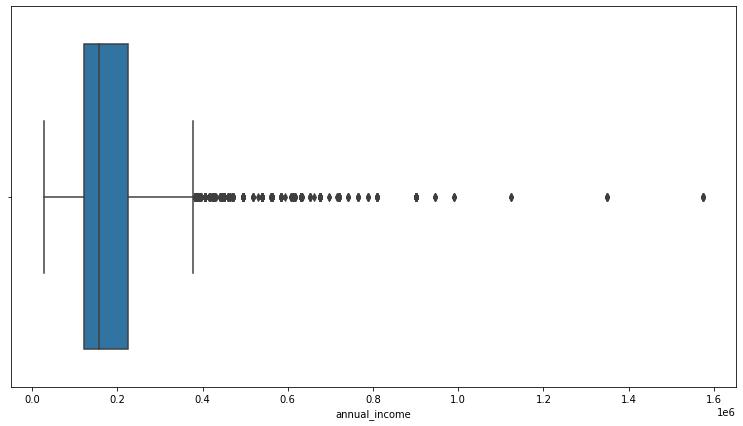

In [26]:
plt.figure(figsize=(13,7))
sns.boxplot(df.annual_income)

<AxesSubplot:xlabel='annual_income'>

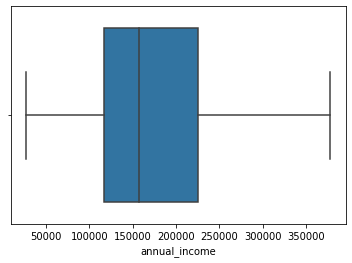

In [27]:
#Option: Z-score or IQR, z-score only for Gaugassian distribution => IQR

def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(df.annual_income)

df = df.loc[(df.annual_income > lower) & (df.annual_income < upper)]

sns.boxplot(df.annual_income)

<AxesSubplot:xlabel='fam_members'>

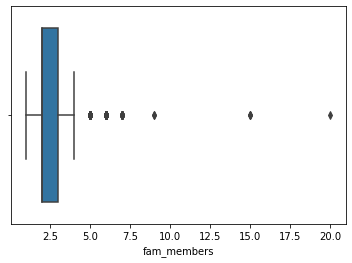

In [28]:

#Detect and remove outliers: Fam_members

sns.boxplot(df.fam_members)

2.0    18729
1.0     6721
3.0     6057
4.0     2976
Name: fam_members, dtype: int64

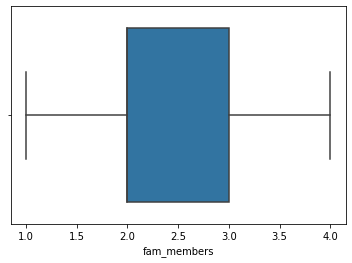

In [29]:

remove_outlier(df.fam_members)

df = df.loc[(df.fam_members>0.5) & (df.fam_members <4.5)]

sns.boxplot(df.fam_members)

df.fam_members.value_counts()

In [30]:
df.head()

,id,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,mobile_phone,work_phone,phone,email,occupation_type,fam_members,months_balance,status,age,year_of_employment
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,0,0,59.0,3.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,1,52.0,8.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,-22,-1,52.0,8.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,0,52.0,8.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,0,52.0,8.0


In [31]:
df.status.value_counts()

 0    17052
-1     9079
 1     7997
 2      262
 6       64
 3       18
 4        6
 5        5
Name: status, dtype: int64

<AxesSubplot:xlabel='status'>

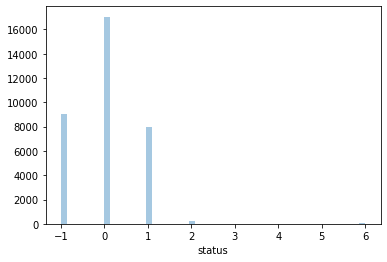

In [32]:

sns.distplot(df.status, kde=False)

In [33]:
#Target = 1 if status >=1 (with due debt), else Target = 0
df['target'] = None
df.loc[df.status < 1,'target']=0
df.loc[df.status >= 1,'target']=1
df.target = pd.to_numeric(df.target)
df.head()

,id,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,...,work_phone,phone,email,occupation_type,fam_members,months_balance,status,age,year_of_employment,target
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,0,0,59.0,3.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,1,52.0,8.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,-22,-1,52.0,8.0,0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,0,52.0,8.0,0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,0,52.0,8.0,0


In [34]:
#Drop unnecessary columns
df.drop(columns=['months_balance', 'status', 'mobile_phone'],inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34483 entries, 2 to 36456
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  34483 non-null  int64  
 1   gender              34483 non-null  object 
 2   car                 34483 non-null  object 
 3   property            34483 non-null  object 
 4   children            34483 non-null  int64  
 5   annual_income       34483 non-null  float64
 6   income_type         34483 non-null  object 
 7   education           34483 non-null  object 
 8   family_status       34483 non-null  object 
 9   housing_type        34483 non-null  object 
 10  work_phone          34483 non-null  int64  
 11  phone               34483 non-null  int64  
 12  email               34483 non-null  int64  
 13  occupation_type     34483 non-null  object 
 14  fam_members         34483 non-null  float64
 15  age                 34483 non-null  float64
 16  year

In [36]:
#Convert object dtype to category dtype for feature processing
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].astype('category')

df.dtypes

id                       int64
gender                category
car                   category
property              category
children                 int64
annual_income          float64
income_type           category
education             category
family_status         category
housing_type          category
work_phone               int64
phone                    int64
email                    int64
occupation_type       category
fam_members            float64
age                    float64
year_of_employment     float64
target                   int64
dtype: object

# Feature eng

In [37]:
#Category encoding
#2.1. Encoding without using the target variable (no independent variables are impacted prior to modeling)
#2.1.1. Binary variable: LabelEncoder, Binarizer
#2.1.2. Nominal variable: using mean or mode // Dummy Coding or OneHotEncoder (<5 values/variable)
#2.1.3. Continous variable: binning with Fixed-width and Adaptive Binning, then apply mean/mode


#2.2. Encoding in relation to the target variable
#2.2.1. WOE Encoder (to pair with IV): apply to the entire dataset
#2.2.2. Compare with Target Encoder/LOO

In [38]:
df_a = df #for 2.1. encoding without target

In [39]:

df_b = df #for 2.2. encoding with target

In [40]:
#Pre-requisite: train test split to avoid data leakage

x_a = df_a.iloc[:, 1:-1]
y_a = df_a.iloc[:, -1]

from sklearn.model_selection import train_test_split

x_a_train, x_a_test, y_a_train, y_a_test = train_test_split(x_a, y_a, test_size=0.3, random_state=1)

In [41]:
#Encoding WITHOUT target (using df_a)

#2.1.1 Binary variables: gender, car, property

#Option 1: Label Encoder (applied to >2 categories per variable)
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

le = LabelEncoder()
gender_le = le.fit_transform(x_a_train.gender)

#Option 2: LabelBinarizer (applied to 2 categories per variable only)
bn = LabelBinarizer()

gender_bn = np.array(x_a_train.gender).reshape(-1,1)
gender_bn = bn.fit_transform(gender_bn)

#Apply to x_train and x_test

x_a_train.loc[:, 'gender'] = le.fit_transform(x_a_train.loc[:, 'gender'])
x_a_train.loc[:, 'car'] = le.fit_transform(x_a_train.loc[:, 'car'])
x_a_train.loc[:, 'property'] = le.fit_transform(x_a_train.loc[:, 'property'])

x_a_test.loc[:, 'gender'] = le.fit_transform(x_a_test.loc[:, 'gender'])
x_a_test.loc[:, 'car'] = le.fit_transform(x_a_test.loc[:, 'car'])
x_a_test.loc[:, 'property'] = le.fit_transform(x_a_test.loc[:, 'property'])

C:\Users\t\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,work_phone,phone,email,occupation_type,fam_members,age,year_of_employment
7293,0,0,1,0,157500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0,1,1,Sales staff,2.0,50.0,4.0
25145,1,0,0,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,1,1,0,Laborers,2.0,53.0,14.0
18640,1,1,1,0,202500.0,Working,Secondary / secondary special,Married,Municipal apartment,0,1,0,Sales staff,2.0,46.0,1.0
23707,0,0,0,0,67500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,0,0,0,Others,1.0,61.0,0.0
2403,0,0,1,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,0,0,1,Others,2.0,56.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16496,1,1,1,0,90000.0,Working,Secondary / secondary special,Married,With parents,1,0,0,Others,2.0,31.0,8.0
12303,0,0,0,0,270000.0,Commercial associate,Secondary / secondary special,Separated,Municipal apartment,1,1,0,Sales staff,1.0,47.0,3.0
904,0,1,1,2,90000.0,State servant,Secondary / secondary special,Married,House / apartment,0,0,0,Cooking staff,4.0,35.0,12.0
18767,1,0,1,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Laborers,2.0,60.0,9.0


In [44]:
#2.1.2. Nominal variables: income_type, education, family_status, housing_type, occupation_type

#Option 1: Dummy Coding: kn - k variables

income_type_dummy = pd.get_dummies(x_a_train.income_type)
print(income_type_dummy)

#Option 2: OneHotEcnoder: kn variables

from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False, drop='first', handle_unknown='error')
income_type_onehot = onehot.fit_transform(x_a_train.income_type.to_numpy().reshape(-1,1))
income_type_onehot = pd.DataFrame(income_type_onehot, columns=onehot.get_feature_names(['income_type']))
income_type_onehot.head()

#As OneHotEncoder of sklearn was designed to keep the consistency in the number of categories across train and
#test set, so we can control any category which doesn't appear in train set with "handle_unknown="error""

#Apply for x_train set

nominal = onehot.fit_transform(x_a_train[['income_type', 'education', 'family_status', 'housing_type', 
                                             'occupation_type']])
df_nominal = pd.DataFrame(index=x_a_train.index, data=nominal, columns=onehot.get_feature_names(['income_type', 'education', 'family_status',
                                                                        'housing_type', 'occupation_type']))
x_a_train = pd.concat([x_a_train, df_nominal], axis=1)
x_a_train.drop(columns=['income_type', 'education', 'family_status', 'housing_type', 'occupation_type'], inplace=True)
x_a_train.shape

       Commercial associate  Pensioner  State servant  Student  Working
25003                     0          1              0        0        0
34848                     0          1              0        0        0
13418                     1          0              0        0        0
13885                     0          0              0        0        1
26023                     0          0              0        0        1
...                     ...        ...            ...      ...      ...
8257                      0          1              0        0        0
34349                     0          0              0        0        1
5489                      0          1              0        0        0
12808                     0          0              0        0        1
34865                     1          0              0        0        0

[24138 rows x 5 columns]


(24138, 46)

In [45]:

nominal_test = onehot.fit_transform(x_a_test[['income_type', 'education', 'family_status', 'housing_type', 
                                             'occupation_type']])
df_nominal_test = pd.DataFrame(index=x_a_test.index, data=nominal_test, columns=onehot.get_feature_names(['income_type', 'education', 'family_status',
                                                                        'housing_type', 'occupation_type']))
x_a_test = pd.concat([x_a_test, df_nominal_test], axis=1)
x_a_test.drop(columns=['income_type', 'education', 'family_status', 'housing_type', 'occupation_type'], inplace=True)
x_a_test.head()

,gender,car,property,children,annual_income,work_phone,phone,email,fam_members,age,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff
7293,0,0,1,0,157500.0,0,1,1,2.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25145,1,0,0,0,180000.0,1,1,0,2.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18640,1,1,1,0,202500.0,0,1,0,2.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23707,0,0,0,0,67500.0,0,0,0,1.0,61.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2403,0,0,1,0,157500.0,0,0,1,2.0,56.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([12767.,  5353.,  2842.,  1624.,   640.,   412.,   304.,   115.,
           49.,    32.]),
 array([ 0. ,  4.3,  8.6, 12.9, 17.2, 21.5, 25.8, 30.1, 34.4, 38.7, 43. ]),
 <BarContainer object of 10 artists>)

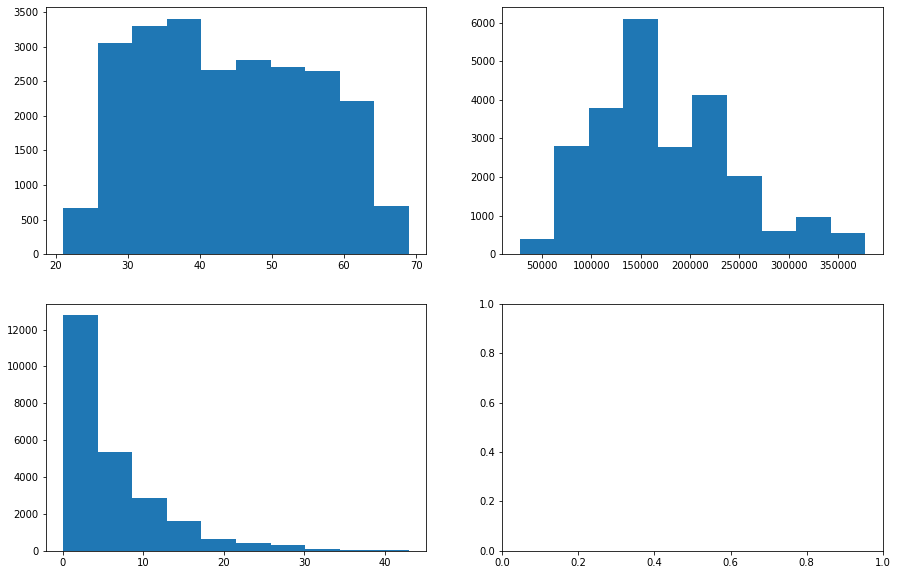

In [46]:

#2.1.3. Continuous variables: annual_income, age, year_of_employment

fig, ax = plt.subplots(2,2,figsize=(15,10))

ax[0][0].hist(x_a_train.age)
ax[0][1].hist(x_a_train.annual_income)
ax[1][0].hist(x_a_train.year_of_employment)

In [47]:
#Option: Fixed-width binning (rounding) or Adaptive binning (quantiles)
#Here, we apply adaptive binning since fixed-width binning requires pre-defining the bins (which is subjective)

#Apply to x_train set

x_a_train['age_binned'] = pd.qcut(x_a_train.age, q=[0, .25, .50, .75, 1])
x_a_train['annual_income_binned'] = pd.qcut(x_a_train.annual_income, q=[0, .25, .50, .75, 1])
x_a_train['year_of_employment_binned'] = pd.qcut(x_a_train.year_of_employment, q=[0, .25, .50, .75, 1])

x_a_train.drop(columns=['age', 'annual_income', 'year_of_employment'], inplace=True)

#Since each category is divided into 5 equal bins, we can apply Label Encoder without bias

x_a_train['age'] = le.fit_transform(x_a_train['age_binned'])
x_a_train['annual_income'] = le.fit_transform(x_a_train['annual_income_binned'])
x_a_train['year_of_employment'] = le.fit_transform(x_a_train['year_of_employment_binned'])

x_a_train.drop(columns=['age_binned','annual_income_binned', 'year_of_employment_binned'],inplace=True)

x_a_train.head()

,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,income_type_State servant,...,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,age,annual_income,year_of_employment
25003,0,1,0,0,0,1,0,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0
34848,0,0,0,0,0,0,0,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0
13418,0,1,1,2,0,0,0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
13885,1,1,1,0,1,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2
26023,0,0,0,0,0,0,0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,2


In [48]:
#Apply to x_test set

x_a_test['age_binned'] = pd.qcut(x_a_test.age, q=[0, .25, .50, .75, 1])
x_a_test['annual_income_binned'] = pd.qcut(x_a_test.annual_income, q=[0, .25, .50, .75, 1])
x_a_test['year_of_employment_binned'] = pd.qcut(x_a_test.year_of_employment, q=[0, .25, .50, .75, 1])

x_a_test.drop(columns=['age', 'annual_income', 'year_of_employment'], inplace=True)

#Since each category is divided into 5 equal bins, we can apply Label Encoder without bias

x_a_test['age'] = le.fit_transform(x_a_test['age_binned'])
x_a_test['annual_income'] = le.fit_transform(x_a_test['annual_income_binned'])
x_a_test['year_of_employment'] = le.fit_transform(x_a_test['year_of_employment_binned'])

x_a_test.drop(columns=['age_binned','annual_income_binned', 'year_of_employment_binned'],inplace=True)

x_a_test.head()

,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,income_type_State servant,...,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,age,annual_income,year_of_employment
7293,0,0,1,0,0,1,1,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,1
25145,1,0,0,0,1,1,0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,3
18640,1,1,1,0,0,1,0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,0
23707,0,0,0,0,0,0,0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0
2403,0,0,1,0,0,0,1,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,0


In [49]:
#2.2. Encoding WITH target (using df_b)

#Pre-requisite: train test split to avoid data leakage

x_b = df_b.iloc[:, 1:-1]
y_b = df_b.iloc[:, -1]

from sklearn.model_selection import train_test_split

x_b_train, x_b_test, y_b_train, y_b_test = train_test_split(x_b, y_b, test_size=0.3, random_state=1)

In [50]:
# installl https://pypi.org/project/category-encoders/ 
#3 Options: WOE Encoder, Target Encoder or LOO

#Option 1: WOE Encoder
import category_encoders as ce

woe = ce.WOEEncoder()

def woe_encoder(col, target):
    for i in range(len(x_b_train.columns)):
        col.iloc[:,i] = woe.fit_transform(col, target)
    return col

df_woe_train = woe_encoder(x_b_train, y_b_train)
df_woe_train.head()

C:\Users\t\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,work_phone,phone,email,occupation_type,fam_members,age,year_of_employment
25003,0.005375,-0.035088,-0.044545,0,117000.0,0.004123,0.024819,-0.003870,-0.002500,0,1,0,-0.011161,2.0,59.0,0.0
34848,0.005375,0.020022,-0.044545,0,94500.0,0.004123,0.024819,0.005755,-0.002500,0,0,0,-0.011161,2.0,56.0,0.0
13418,0.005375,-0.035088,0.021841,2,157500.0,-0.005692,-0.069921,0.005755,-0.002500,0,0,0,0.043684,4.0,43.0,2.0
13885,-0.011444,-0.035088,0.021841,0,135000.0,0.012575,0.024819,0.021731,-0.051456,1,1,0,-0.029873,1.0,28.0,8.0
26023,0.005375,0.020022,-0.044545,0,67500.0,0.012575,0.024819,0.005755,-0.002500,0,0,0,0.038679,2.0,27.0,6.0


In [51]:
df_woe_test = woe_encoder(x_b_test, y_b_test)
df_woe_test.head()

C:\Users\t\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,work_phone,phone,email,occupation_type,fam_members,age,year_of_employment
7293,-0.011049,-0.020542,0.020472,0,157500.0,-0.000074,0.038139,-0.176170,0.005768,0,1,1,-0.034225,2.0,50.0,4.0
25145,0.022907,-0.020542,-0.042671,0,180000.0,-0.000074,0.038139,-0.002930,0.005768,1,1,0,-0.010643,2.0,53.0,14.0
18640,0.022907,0.034169,0.020472,0,202500.0,-0.000074,0.038139,-0.002930,-0.024290,0,1,0,-0.034225,2.0,46.0,1.0
23707,-0.011049,-0.020542,-0.042671,0,67500.0,-0.014310,0.038139,0.209952,0.005768,0,0,0,0.022862,1.0,61.0,0.0
2403,-0.011049,-0.020542,0.020472,0,157500.0,-0.014310,0.038139,-0.002930,0.005768,0,0,1,0.022862,2.0,56.0,0.0


In [52]:
#Option 2: Target Encoder

y_b_train = pd.to_numeric(y_b_train)
y_b_test = pd.to_numeric(y_b_test)

from category_encoders import TargetEncoder

te = TargetEncoder()

def target_encoder(col, target):
    for i in range(len(x_b_train.columns)):
        col.iloc[:,i] = te.fit_transform(col, target)
    return col

df_te_train = target_encoder(x_b_train, y_b_train)
df_te_train.head()

C:\Users\t\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,work_phone,phone,email,occupation_type,fam_members,age,year_of_employment
25003,0.005375,-0.035088,-0.044545,0,117000.0,0.004123,0.024819,-0.003870,-0.002500,0,1,0,-0.011161,2.0,59.0,0.0
34848,0.005375,0.020022,-0.044545,0,94500.0,0.004123,0.024819,0.005755,-0.002500,0,0,0,-0.011161,2.0,56.0,0.0
13418,0.005375,-0.035088,0.021841,2,157500.0,-0.005692,-0.069921,0.005755,-0.002500,0,0,0,0.043684,4.0,43.0,2.0
13885,-0.011444,-0.035088,0.021841,0,135000.0,0.012575,0.024819,0.021731,-0.051456,1,1,0,-0.029873,1.0,28.0,8.0
26023,0.005375,0.020022,-0.044545,0,67500.0,0.012575,0.024819,0.005755,-0.002500,0,0,0,0.038679,2.0,27.0,6.0


In [53]:
#3. Feature Scaling (Data Standardization/Normalization)

#3.1. df_a (encoded without target)

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

x_a_train_ss = pd.DataFrame(StandardScaler().fit_transform(x_a_train), columns=x_a_train.columns)
x_a_train_ss.head()

,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,income_type_State servant,...,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,age,annual_income,year_of_employment
0,-0.686768,1.314445,-1.415929,-0.599431,-0.539709,1.557177,-0.312539,-0.184721,2.161371,-0.292968,...,1.476279,-0.097435,-0.046014,-0.325155,-0.066098,-0.129314,-0.07009,1.392870,-1.329728,-1.242572
1,-0.686768,-0.760777,-1.415929,-0.599431,-0.539709,-0.642188,-0.312539,-0.184721,2.161371,-0.292968,...,1.476279,-0.097435,-0.046014,-0.325155,-0.066098,-0.129314,-0.07009,1.392870,-1.329728,-1.242572
2,-0.686768,1.314445,0.706250,2.477130,-0.539709,-0.642188,-0.312539,2.218294,-0.462669,-0.292968,...,-0.677379,-0.097435,-0.046014,-0.325155,-0.066098,-0.129314,-0.07009,-0.408566,-0.375824,-0.373657
3,1.456097,1.314445,0.706250,-0.599431,1.852851,1.557177,-0.312539,-1.386228,-0.462669,-0.292968,...,-0.677379,-0.097435,-0.046014,-0.325155,-0.066098,-0.129314,-0.07009,-1.309283,-0.375824,0.495258
4,-0.686768,-0.760777,-1.415929,-0.599431,-0.539709,-0.642188,-0.312539,-0.184721,-0.462669,-0.292968,...,-0.677379,-0.097435,-0.046014,3.075452,-0.066098,-0.129314,-0.07009,-1.309283,-1.329728,0.495258


In [54]:
x_a_train_rs = pd.DataFrame(RobustScaler().fit_transform(x_a_train), columns=x_a_train.columns)
x_a_train_rs.head()

,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,income_type_State servant,...,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,age,annual_income,year_of_employment
0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.5,-0.5
1,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.5,-0.5
2,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,1.0,1.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.5
4,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.5,-0.5,0.5


In [56]:
#Standard Scaler shrinks data to mean=0 and std =1 with the presence of outlier affecting the balanced scale
#MinMaxScaler compress data to a range of [0,1] which is limited to modeling
#Robust Scaler shrinks data to medians and quantiles, thus not influenced by outliers

#Apply to x_test set

x_a_test_rs = pd.DataFrame(RobustScaler().fit_transform(x_a_test), columns=x_a_test.columns)

In [57]:
#3.2. Apply the same scaling to df_b (encoded with targets)

x_b_train_rs = pd.DataFrame(RobustScaler().fit_transform(x_b_train), columns=x_b_train.columns)
x_b_test_rs = pd.DataFrame(RobustScaler().fit_transform(x_b_test), columns=x_b_test.columns)

In [58]:
x_b_train_rs

,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,work_phone,phone,email,occupation_type,fam_members,age,year_of_employment
0,0.0,-1.0,-1.0,0.0,-0.375000,-0.462696,0.000000,-0.009625,0.000000,0.0,1.0,0.0,0.000000,0.0,0.80,-0.571429
1,0.0,0.0,-1.0,0.0,-0.583333,-0.462696,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.65,-0.571429
2,0.0,-1.0,0.0,2.0,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.0,0.0,0.0,0.677506,2.0,0.00,-0.285714
3,-1.0,-1.0,0.0,0.0,-0.208333,0.000000,0.000000,0.015976,-0.048956,1.0,1.0,0.0,-0.231147,-1.0,-0.75,0.571429
4,0.0,0.0,-1.0,0.0,-0.833333,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.615678,0.0,-0.80,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24133,0.0,0.0,0.0,0.0,0.000000,-0.462696,-3.433391,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1.05,-0.571429
24134,-1.0,-1.0,0.0,1.0,1.041667,0.000000,-1.000000,0.000000,0.000000,0.0,0.0,0.0,-0.384322,1.0,0.70,-0.571429
24135,0.0,0.0,0.0,0.0,-0.708333,-0.462696,0.000000,-0.009625,0.000000,0.0,0.0,0.0,0.000000,0.0,0.85,-0.571429
24136,0.0,0.0,-1.0,0.0,0.166667,0.000000,0.000000,0.015976,0.000000,0.0,0.0,0.0,-0.231147,-1.0,0.40,-0.285714


In [59]:
#4. Dealing with imbalanced data (Random Undersampling / Oversampling (SMOTE))

#the same for both df_a and df_b set

a_target_0 = df_a[df_a.target == 0].target.count() / df_a.target.count()
a_target_1 = df_a[df_a.target == 1].target.count() / df_a.target.count()

print(a_target_0)
print(a_target_1)

0.7577936954441319
0.2422063045558681


In [60]:
#4.1. Oversampling (SMOTE: Synthetic Minority Oversampling Technique)

from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()

x_a_train_rs_over, y_a_train_over = oversample.fit_resample(x_a_train_rs, y_a_train)
print(Counter(y_a_train_over))

Counter({1: 18324, 0: 18324})


In [61]:

#4.2. Random Undersampling

from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler()

x_a_train_rs_under, y_a_train_under = undersample.fit_resample(x_a_train_rs, y_a_train)
print(Counter(y_a_train_under))

Counter({0: 5814, 1: 5814})


In [62]:
#Random Undersampling randomly select data from the majority class to delete from the dataset
#which might result in information loss during modeling

#SMOTE (Oversampling) duplicates data from the minority class which helps balance the distribution but does not
#provide any additional information to the model

#Apply to x_test_set
x_a_test_rs_over, y_a_test_over = oversample.fit_resample(x_a_test_rs, y_a_test)
print(Counter(y_a_test_over))


#Apply to x_b set

x_b_train_rs_over, y_b_train_over = oversample.fit_resample(x_b_train_rs, y_b_train)
print(Counter(y_b_train_over))

x_b_test_rs_over, y_b_test_over = oversample.fit_resample(x_b_test_rs, y_b_test)
print(Counter(y_b_test_over))

Counter({0: 7807, 1: 7807})
Counter({1: 18324, 0: 18324})
Counter({0: 7807, 1: 7807})


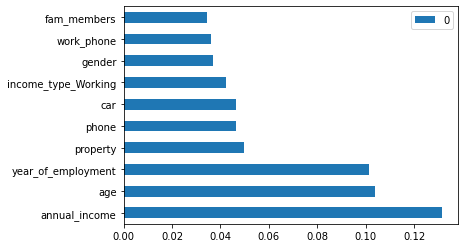

In [63]:
#5.1. Feature Importance

#5.1.1. Test on df_a set first
from sklearn.ensemble import ExtraTreesClassifier

fi = ExtraTreesClassifier()
fi_a = fi.fit(x_a_train_rs_over, y_a_train_over)

df_fi_a = pd.DataFrame(fi_a.feature_importances_,index=x_a_train_rs_over.columns)
df_fi_a.nlargest(10,df_fi_a.columns).plot(kind='barh')
plt.show()

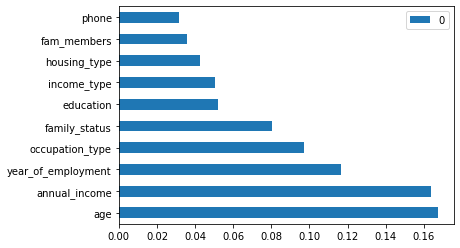

In [64]:
#5.1.2. Test on df_b set

fi_b = fi.fit(x_b_train_rs_over, y_b_train_over)

df_fi_b = pd.DataFrame(fi_b.feature_importances_,index=x_b_train_rs_over.columns)
df_fi_b.nlargest(10,df_fi_b.columns).plot(kind='barh')
plt.show()

occupation_type_Sales staff                0.010710
occupation_type_Cooking staff              0.010871
income_type_Working                        0.010913
occupation_type_Security staff             0.015034
family_status_Married                      0.019481
age                                        0.020678
housing_type_House / apartment             0.021360
education_Secondary / secondary special    0.022060
property                                   0.034113
target                                     1.000000
Name: target, dtype: float64


<AxesSubplot:>

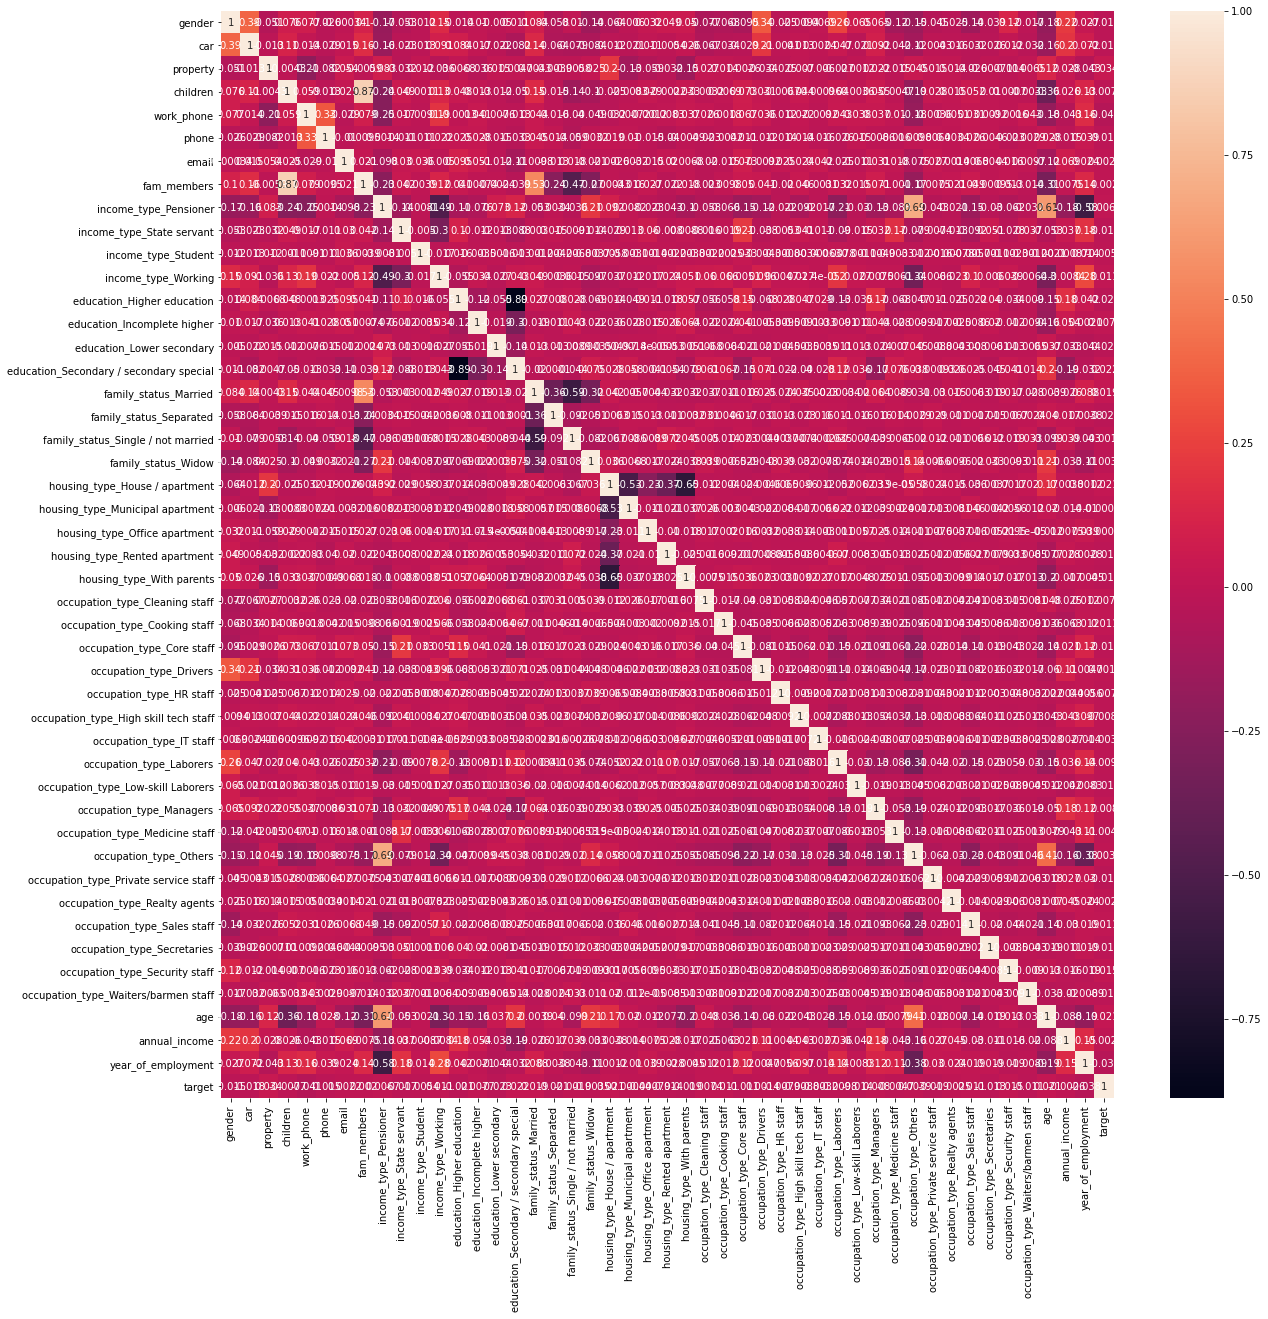

In [65]:
#5.2. Correlation Matrix

#5.2.1. Test on df_a set

df_a_train_processed = pd.concat([x_a_train_rs_over, y_a_train_over], axis=1) #combine processed features with their target

cm_a = df_a_train_processed.corr()

print(cm_a.target.sort_values().tail(10))

plt.figure(figsize=(20,20))
sns.heatmap(cm_a, xticklabels=df_a_train_processed.columns, yticklabels=df_a_train_processed.columns,annot=True)

age                0.009263
gender             0.010769
income_type        0.014038
housing_type       0.016039
car                0.020537
property           0.021312
family_status      0.024871
education          0.028315
occupation_type    0.038555
target             1.000000
Name: target, dtype: float64
age                0.009263
gender             0.010769
income_type        0.014038
housing_type       0.016039
car                0.020537
property           0.021312
family_status      0.024871
education          0.028315
occupation_type    0.038555
target             1.000000
Name: target, dtype: float64


<AxesSubplot:>

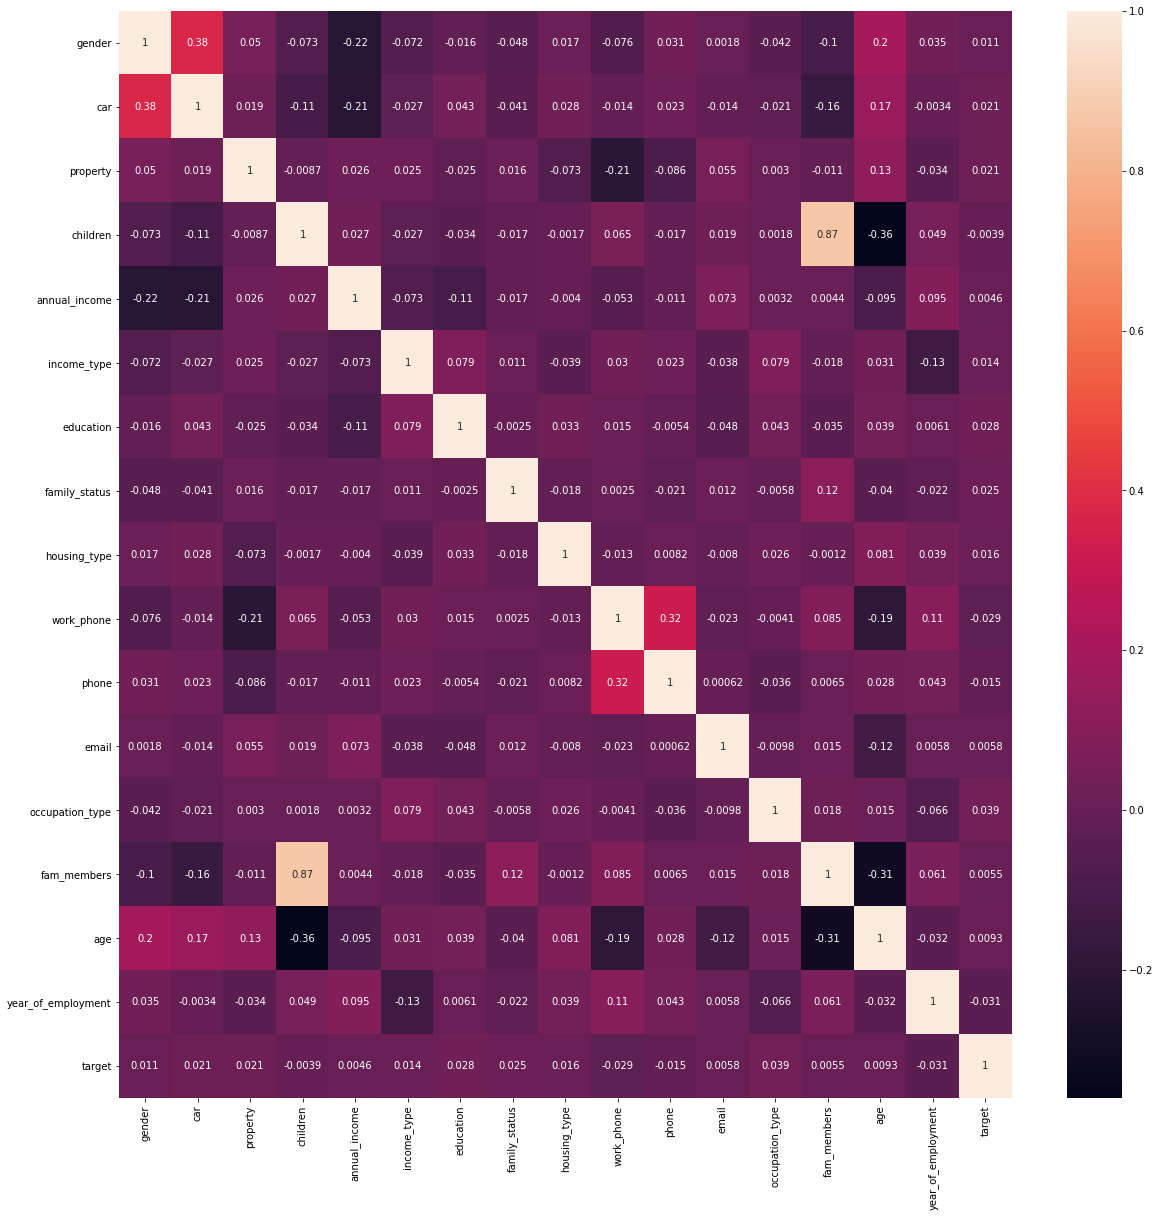

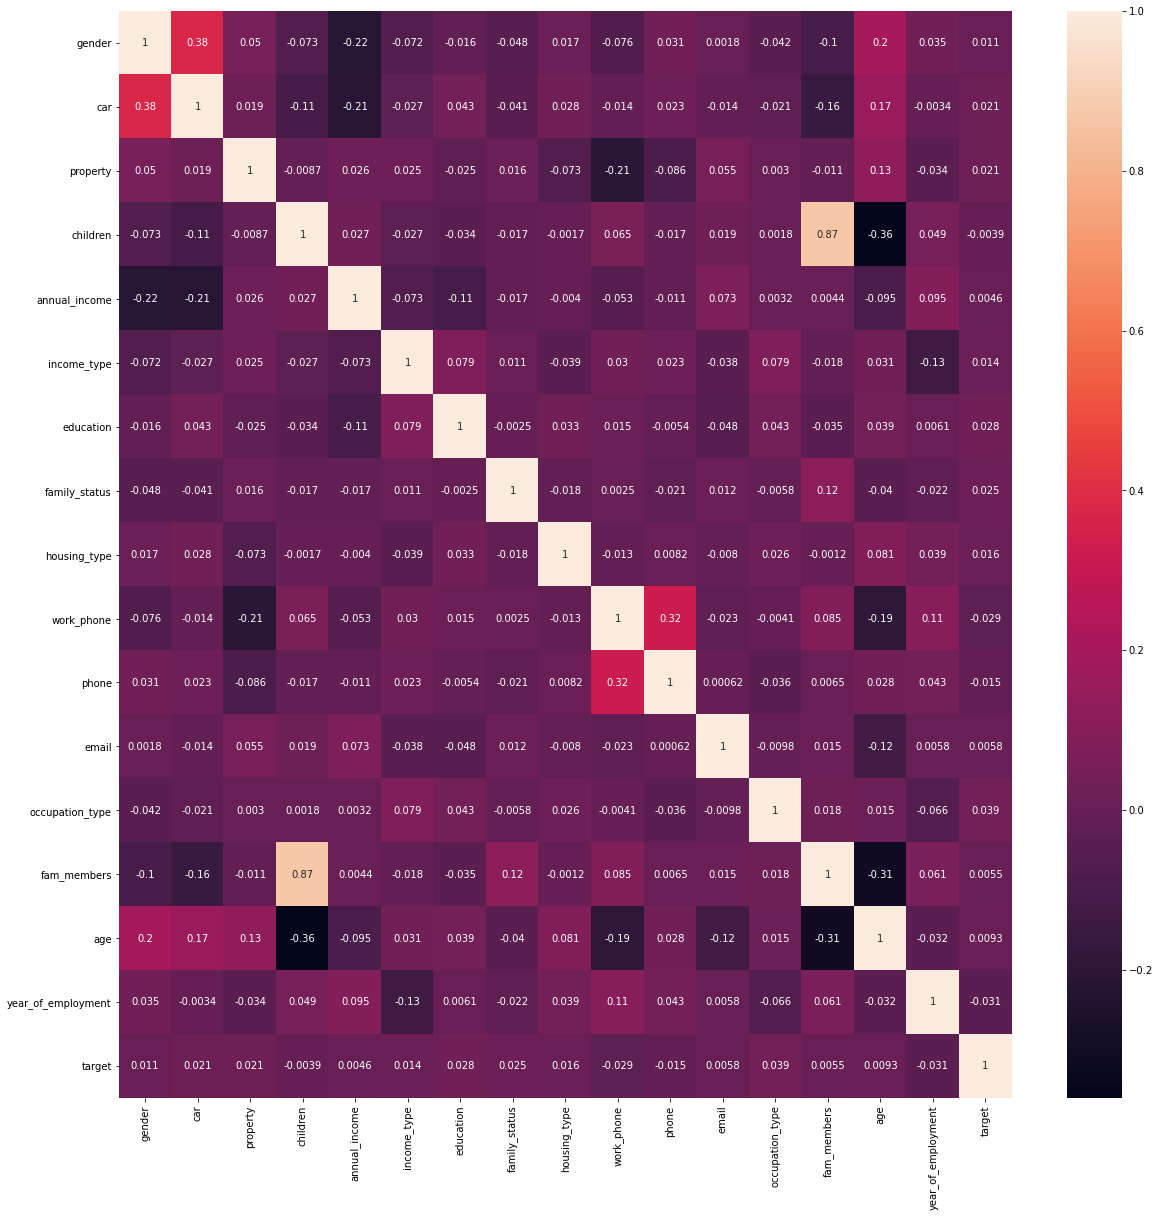

In [66]:
#5.2.2. Test on df_b set

df_b_train_processed = pd.concat([x_b_train_rs_over, y_b_train_over], axis=1) #combine processed features with their target

cm_b = df_b_train_processed.corr()

print(cm_b.target.sort_values().tail(10))

plt.figure(figsize=(20,20))
sns.heatmap(cm_b, xticklabels=df_b_train_processed.columns, yticklabels=df_b_train_processed.columns,annot=True)#5.2.2. Test on df_b set

df_b_train_processed = pd.concat([x_b_train_rs_over, y_b_train_over], axis=1) #combine processed features with their target

cm_b = df_b_train_processed.corr()

print(cm_b.target.sort_values().tail(10))

plt.figure(figsize=(20,20))
sns.heatmap(cm_b, xticklabels=df_b_train_processed.columns, yticklabels=df_b_train_processed.columns,annot=True)

24


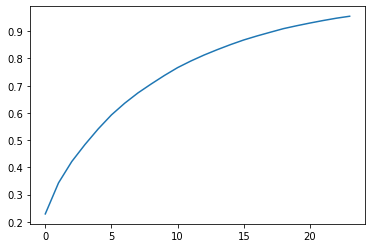

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.078791,1.226210,-0.141818,0.094063,0.261560,0.804517,0.551717,-0.004328,0.766330,0.030856,...,-0.226935,-0.206015,0.080749,0.071042,-0.044994,0.075053,-0.018022,-0.057846,0.060771,-0.002537
1,-1.005597,1.520084,-0.257433,-0.115945,-0.023128,0.468002,-0.055046,0.699717,0.015242,-0.300348,...,-0.173239,-0.063539,-0.105283,0.034191,0.009626,0.070341,-0.020995,-0.066450,-0.090211,-0.007223
2,2.313514,0.897941,1.173846,-0.202598,0.170526,-0.410409,-0.207697,0.028609,0.414272,0.270175,...,0.051991,0.289822,-0.140919,0.431733,-0.653060,0.234228,-0.183257,-0.127222,-0.064233,-0.134968
3,-0.681132,-1.609725,-0.508953,0.166651,0.781728,0.656274,0.256228,-0.612310,0.620482,0.601838,...,0.736724,0.257908,-0.412519,0.095867,-0.183107,-0.152839,-0.035371,-0.177726,0.001195,0.985301
4,0.038490,-0.452493,-0.829958,-0.692037,0.058059,0.334075,-0.630400,0.754564,-0.350612,-0.065338,...,-0.646102,0.390773,0.107934,-0.268304,0.166097,0.173481,-0.147710,0.022614,0.053651,-0.051182


In [68]:

#PCA groups variables by their correlations, and each group is condisidered as a factor
#PCA creates a new set of variables with a smaller set of factors that are uncorrelated
#in such a way that 1st PC explains maximum variance, followed by 2nd and so on (n_components)

#5.3.1. PCA on df_a set

df_a_train_processed.shape

from sklearn.decomposition import PCA

pca = PCA(.95)

pca_a_train = pca.fit(x_a_train_rs_over, y_a_train_over)
print(pca_a_train.n_components_)

plt.plot(np.cumsum(pca_a_train.explained_variance_ratio_))
plt.show()

x_a_train_rs_over_pca = pd.DataFrame(pca_a_train.transform(x_a_train_rs_over))
x_a_train_rs_over_pca.head()

In [69]:
#Apply PCA on x_test set

pca_a_test = pca.fit(x_a_test_rs_over, y_a_test_over)
print(pca_a_test.n_components_)

x_a_test_rs_over_pca = pd.DataFrame(pca_a_test.transform(x_a_test_rs_over))
x_a_test_rs_over_pca.head()

24


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.483573,-0.135288,-0.591302,-0.448587,-0.110357,-0.069838,-0.203236,0.717201,-0.459273,-0.352405,...,-0.519903,-0.244351,0.298164,-0.426663,0.714845,-0.064240,-0.176470,0.416396,-0.054433,-0.085139
1,0.051257,-0.952321,-0.784535,0.585256,-0.863503,0.512410,0.634577,0.212086,0.136005,-0.251220,...,-0.008380,-0.109428,-0.059474,-0.229175,0.008662,-0.110505,-0.036776,0.002630,-0.038908,0.020602
2,-0.129398,-0.178919,-0.165900,0.941339,0.213466,0.656162,-0.251724,0.435010,-0.474704,-0.307195,...,0.313425,-0.397367,-0.041913,-0.373973,-0.193363,-0.258712,-0.441112,0.283825,0.052636,0.011884
3,-1.903490,1.095329,-0.279567,-0.369544,0.376639,0.218580,0.385388,-0.391919,0.608803,-0.011622,...,-0.156893,0.046381,0.405780,0.026213,0.017026,-0.072937,0.166048,0.211743,-0.685713,0.127797
4,-0.920876,1.511041,0.042615,0.175011,-0.095273,-0.166202,-0.206209,-0.105681,-0.241324,-0.193332,...,0.048661,0.086119,-0.016621,-0.137992,0.943627,-0.013748,-0.015517,0.067686,0.106464,-0.073611


In [70]:
# Apply PCA on df_b train set

pca_b_train = pca.fit(x_b_train_rs_over, y_b_train_over)
print(pca_b_train.n_components_)

x_b_train_rs_over_pca = pd.DataFrame(pca_b_train.transform(x_b_train_rs_over))
x_b_train_rs_over_pca.head()

11


,0,1,2,3,4,5,6,7,8,9,10
0,0.435339,-0.622682,0.067850,-0.700518,-0.429756,-0.187244,0.047527,0.655036,0.883848,-0.373481,-0.747711
1,0.433024,-0.698847,0.091894,-0.751331,-0.850704,-0.028732,-0.056848,0.107382,0.069184,-0.823893,-0.008837
2,-0.348111,2.247114,0.780265,-0.842927,-0.123590,0.918496,-0.380550,-0.254550,0.317797,-0.030911,-0.504008
3,0.640455,-0.650452,-0.654774,0.406403,0.366018,-0.855074,1.121905,-0.164879,0.488361,1.049681,0.027487
4,0.751053,-0.131201,0.263087,0.213468,-0.822308,-0.354859,0.898942,-0.552869,-0.565350,-0.471731,-0.171021


In [71]:

# Apply PCA on df_b test set

pca_b_test = PCA(n_components=11).fit(x_b_test_rs_over, y_b_test_over)
print(pca_b_test.n_components_)

x_b_test_rs_over_pca = pd.DataFrame(pca_b_test.transform(x_b_test_rs_over))
x_b_test_rs_over_pca.head()

11


,0,1,2,3,4,5,6,7,8,9,10
0,0.645683,0.207638,-0.502518,-0.229270,-0.349865,-0.265122,0.138666,0.567335,0.031922,-0.465013,-0.086364
1,0.241749,0.118698,-0.326281,1.142633,-0.143728,0.599865,-0.556506,0.941433,-0.224505,0.194301,0.753657
2,0.620028,0.084905,-0.321332,-0.545738,0.679078,0.059437,-0.801541,0.426551,0.404142,-0.430143,0.035566
3,-0.376676,1.517379,-1.158479,-0.722150,-0.821162,0.022729,-0.184413,-0.093377,-0.351801,0.742815,0.031291
4,-0.345384,1.251370,-0.342754,-0.701115,-0.167104,-0.626812,0.120221,-0.010128,-0.177546,-0.131965,-0.050627


In [72]:

#6. Apply algorithm 
# Models to be tested: L ogistic Regression, KNearest, SVM, Decision Tree, Random Forest, XGBoost, LightGBM

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [73]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier()
}